In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Read "Cancer" data

df = pd.read_csv("Cancer.csv") 

In [3]:
## Check data frame

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
## Check the values in ID coulmn
df["id"].nunique()

## All values in the column are unique values and can only be used as labels or unique identifiers and not for modelling

569

In [6]:
## Check for null count and variable types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
## Drop last column "Unnamed: 32" as it has all null values

df = df.drop("Unnamed: 32", axis = 1)

In [8]:
## Check how many unique dignosis types are available

df["diagnosis"].nunique()

2

In [9]:
## Summary statistics

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 1. EDA

In [10]:
## Separating data types

numeric_data = df.select_dtypes(include = [np.number])
categorical_data = df.select_dtypes(exclude = [np.number])

## It can be observed that the only categorical variable is the "diagnosis" parameter which the the variable of interest. Hence,

y = categorical_data

Box Plots

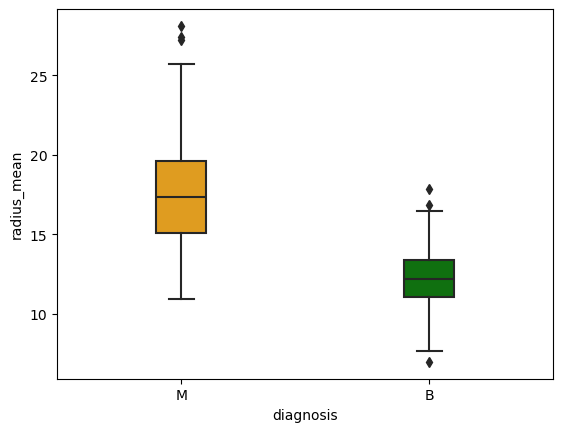

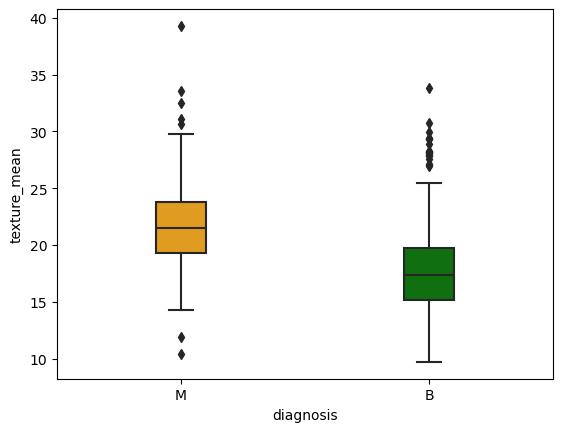

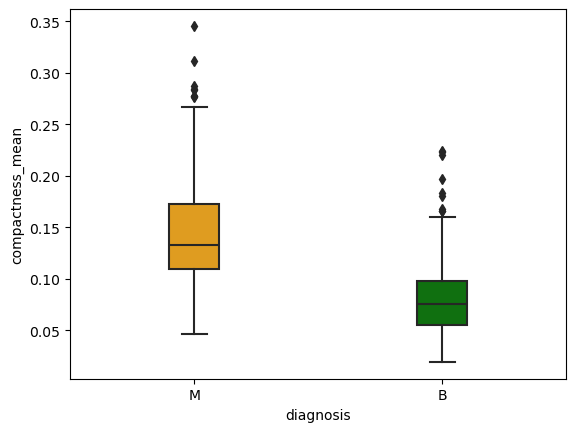

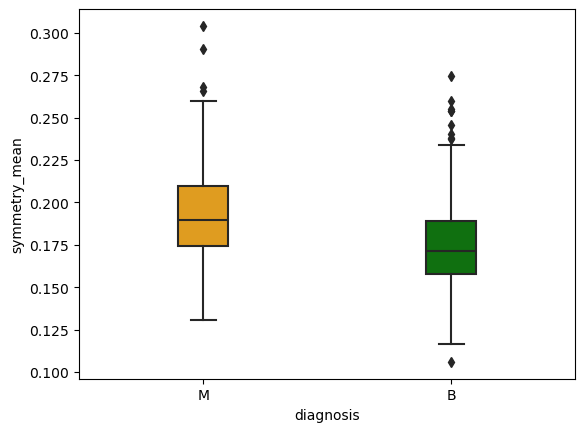

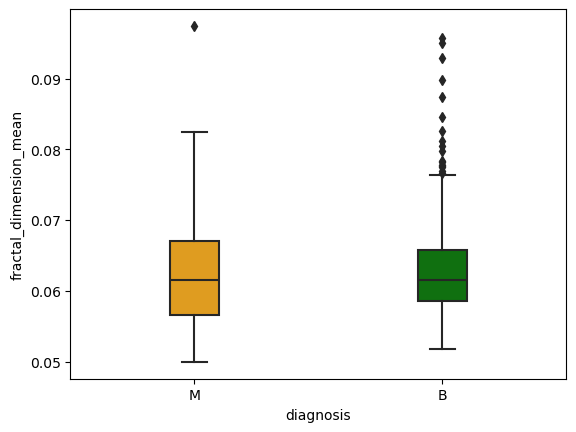

In [11]:
## Box plot of mean radius by diagnosis

diag_palette = {"M": "orange", "B": "green"}


box_feat = ["radius_mean", "texture_mean", "compactness_mean", "symmetry_mean", "fractal_dimension_mean" ]

for i in box_feat:
    sns.boxplot(x ="diagnosis", y = i, data = df, width = 0.2, palette = diag_palette)
    plt.show()


#### Observations from box-plots
- It can be observed that "radius_mean", "texture_mean", "compactness_mean", "symmetry_mean" show some clear distinction in mean values for Malignant and Benign types of tissues

Scatter plots

<Axes: xlabel='radius_mean', ylabel='perimeter_mean'>

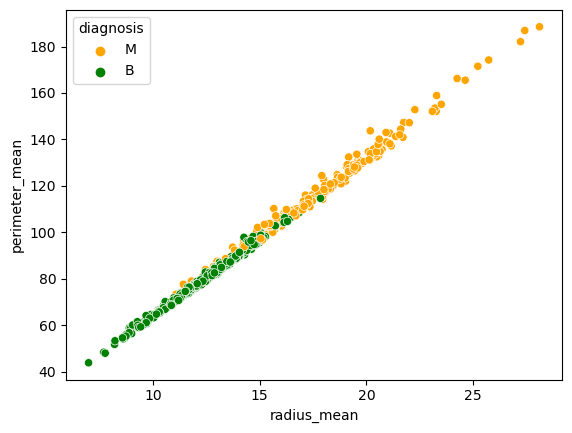

In [12]:
## Scatter plot between mean perimeter and mean radius of the tissue

sns.scatterplot(data = df, x = "radius_mean", y = "perimeter_mean", hue = "diagnosis", palette = diag_palette)

<Axes: xlabel='radius_se', ylabel='perimeter_se'>

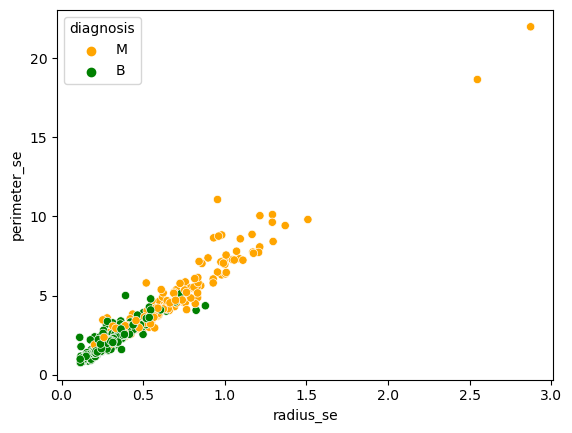

In [13]:
## Scatter plot between standar error of perimeter and radius of the tissue

sns.scatterplot(data = df, x = "radius_se", y = "perimeter_se", hue = "diagnosis", palette = diag_palette)

<Axes: xlabel='radius_mean', ylabel='area_mean'>

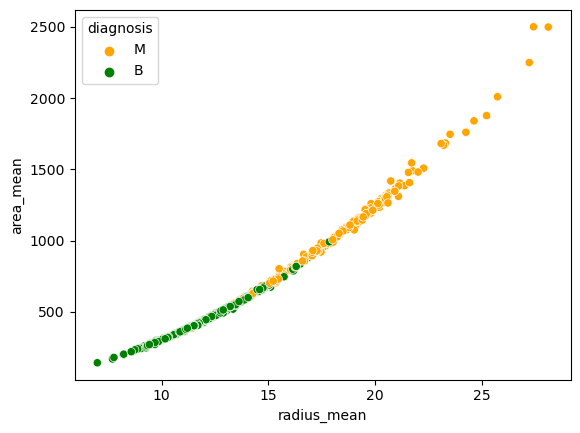

In [14]:
## Scatter plot between standar error of perimeter and radius of the tissue

sns.scatterplot(data = df, x = "radius_mean", y = "area_mean", hue = "diagnosis", palette= diag_palette)

In [15]:
#plt.figure(figsize = (25,25))
#sns.pairplot(data = df.iloc[:,1:11], hue = "diagnosis", palette = diag_palette)

In [16]:
#sns.pairplot(data = df.iloc[:,12:21])

In [17]:
#sns.pairplot(data = df.iloc[:,21:])

#### Observations from scatter plots
- Few variables have a very strong liner relationship, ex. "radius_mean" and "perimeter_mean" which is is as expected since perimeter is a linear function of radius. Same can be said for "radius_worst" and "perimeter_worst" and "radius_se" and "perimeter_se"
- "radius_mean" and "area_mean" can be observed to have a quadratic relationship, which again doesn't come as a surprise since area is a function of radius**2. Same can be said for "radius_worst" and "area_worst", "radius_se" and "area_se"
- Similarly, "concavity_mean" and "concave_points_mean", "concavity_mean" and "compactness_mean" show signs of a strong linear relationship
- Including these variable pairs could cause multicollinearity issues if a linear model is used

Histograms

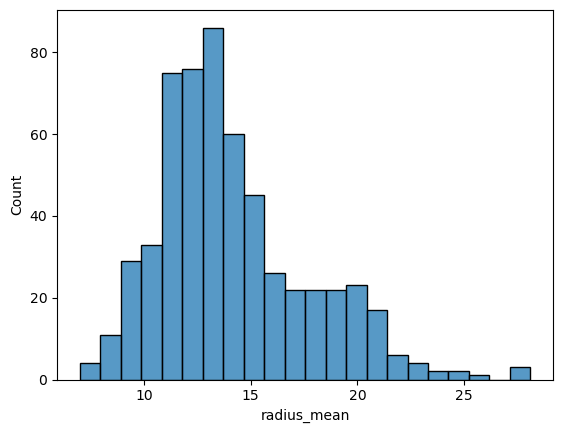

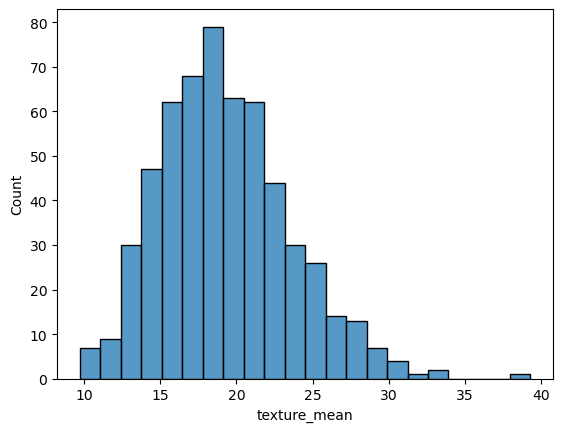

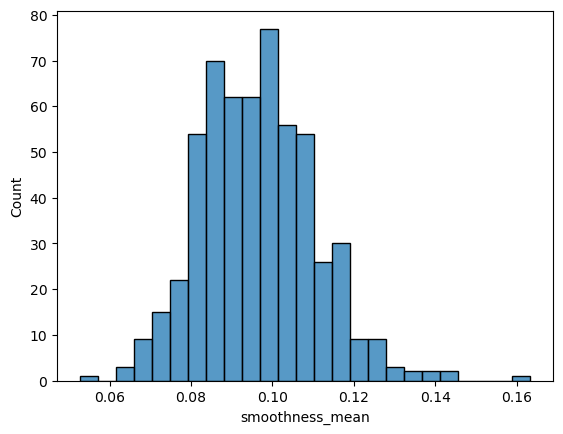

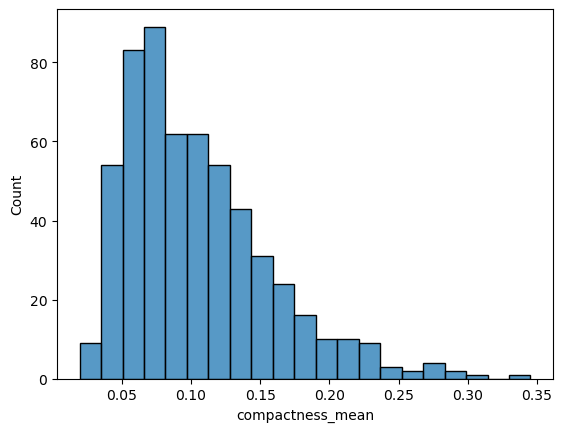

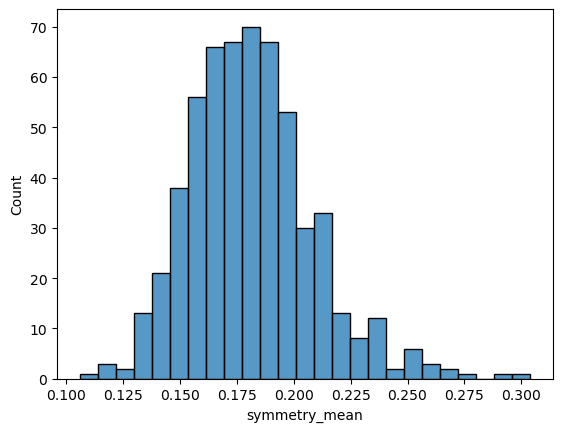

In [18]:
## Check for distribution of radius_mean
atr = ["radius_mean", "texture_mean", "smoothness_mean", "compactness_mean", "symmetry_mean"]
for i in atr:
    sns.histplot(x = df[i])
    plt.show()


- The attributes can be observed to be left skewed indicating non-normal distribution
- Outliers can be observed but they do not appear to be extreme

Correlation plots

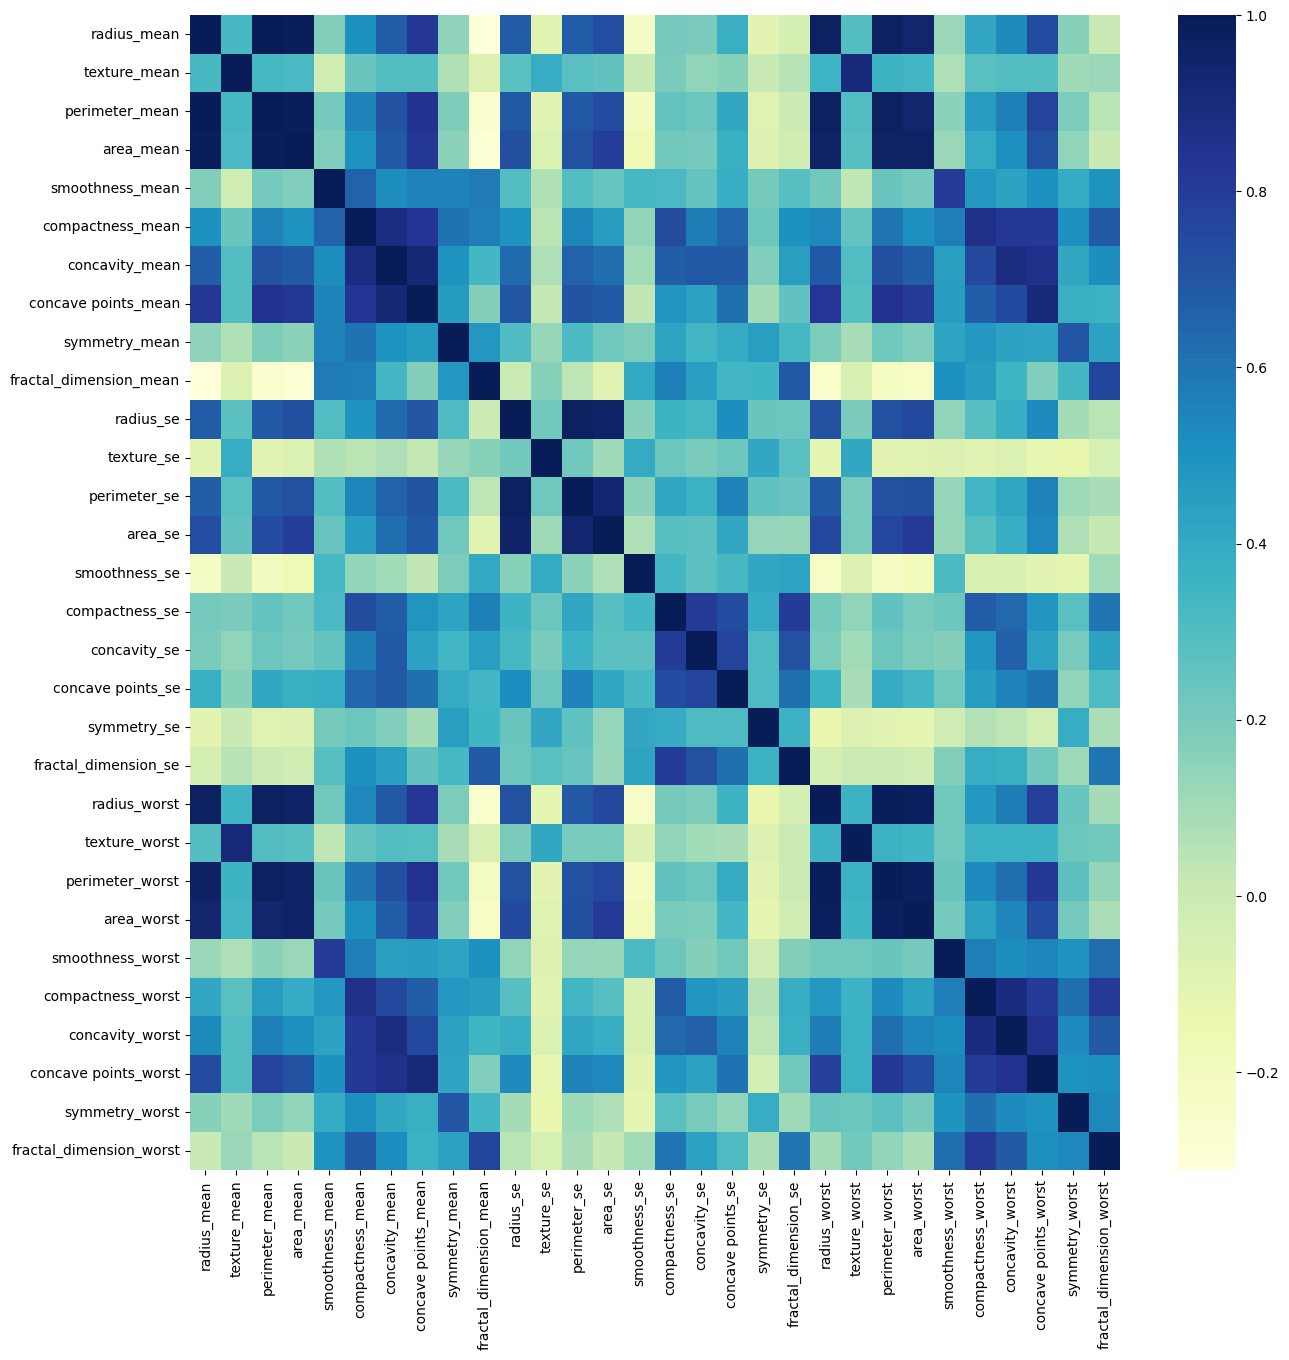

In [19]:
## Correlation plot

data = numeric_data.iloc[:,1:]

fig, axis = plt.subplots(figsize = (15,15))
plot = sns.heatmap(data.corr(), cmap = 'YlGnBu')


- It can be observed from the correlation heatmap that there are certain variables that are very highly correlated, namely "radius_mean" and "perimeter_mean", "radius_mean" and "area_mean"
- This is obvious because the area and perimeter of the cancer tissues are dependent (or calculated) on the radius of the cancer tissue and vice versa
- Hence, including these highly correlated variables will definately lead to multicollinearity and hence we could retain only the radius since the radius determines area and perimeter

In [20]:
## Observe correlation values

cor_df = data.corr().abs()
cor_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


- Additionally, from the values, it can be observed that "concavity_mean" and "concave points_mean" are highly correlated and may be representing the same measure. Hence, it would be ideal to drop one of the two to avoid multicollinearity

### 2. Logistic Regression Model Development

In [21]:
## Check for nulls in df

df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [22]:
## Fit model with no data preprocessing and using all the existing parameters to fit Logistic Regression model to compare
## i.e no columns were dropped

X_old = df.iloc[:,1:]

X_old = X_old.drop('diagnosis', axis = 1)

X_old = sm.add_constant(X_old) ## Add constant = 1 for the intercept

y = [0 if x == "B" else 1 for x in df['diagnosis']] ## Numeric encoding y, using B (Benign) == 0 and M (Malignant) == 1

full_model_1 = sm.GLM(y, X_old, family=sm.families.Binomial()).fit()

r_squared_1 = 1 - (full_model_1.deviance / full_model_1.null_deviance)

r_squared_1

-0.22569204540387156

- R-square value is negetive. This suggests that there are flaws with the model which used all the available attributes as explanatory variable, which is apparent from the EDA conducted

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X_old.columns

vif_data["VIF"] = [variance_inflation_factor(X_old.values, i) 
                          for i in range(len(X_old.columns))]

vif_data[vif_data['VIF'] < 10]

,feature,VIF
5,smoothness_mean,8.194282
9,symmetry_mean,4.220656
12,texture_se,4.205423
15,smoothness_se,4.027923
19,symmetry_se,5.175426
20,fractal_dimension_se,9.717987
29,symmetry_worst,9.520570


In [23]:
## Drop columns with high correlation coefficient values to avoid multicollinearity
## Multicollinearity may cause the model to be sensitive to data and hence may lead to unreliable outcomes in OOS prediction

threshold = 0.85

cols_to_drop = set()
for i in range(len(cor_df.columns)):
    for j in range(i):
        if cor_df.iloc[i, j] >= threshold:
            colname = cor_df.columns[i]  # Column to potentially drop
            cols_to_drop.add(colname)

cols_to_drop = [x for x in cols_to_drop]
new_df = df.drop(columns = cols_to_drop, axis = 1, inplace = True)

ID = df['id']

new_df = df.drop('id', axis = 1)

new_df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2364,0.07678


In [24]:
## Check for Null values

new_df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
smoothness_mean            0
compactness_mean           0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
smoothness_worst           0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [25]:
## Preparing df in which highly correlated columns were dropped

X = new_df.iloc[:,1:]

X = sm.add_constant(X) ## Add constant = 1 for the intercept

y = [0 if x == "B" else 1 for x in df['diagnosis']] ## Numeric encoding y, using B (Benign) == 0 and M (Malignant) == 1

In [26]:
## Model fitting and performance measurement

full_model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

r_squared = 1 - (full_model.deviance / full_model.null_deviance)

r_squared

0.9018672437684667

- The R-square value is reasonable in case of the adjusted dataframe at a value of 0.9

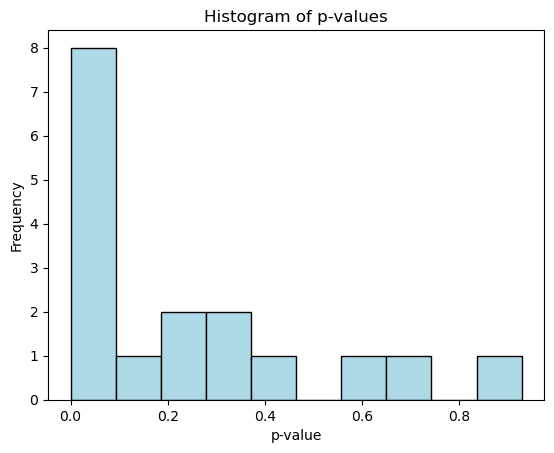

In [27]:
p_values = full_model.pvalues[1:]

# Plot the histogram of p-values
plt.hist(p_values, color="lightblue", edgecolor="black")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.title("Histogram of p-values")
plt.show()

#### Notes on logistic regression model:
- The data frame was checked for null values, and there were none
- The "diagnosis" column was codified with B = 0 and M = 1 to ensure binary outcomes
- Logistic regression was initially fit using all the explanatory parameters available to assess fit. This resulted in an  R-square value of -0.22. This may indicate the using all the parameters availble as is will cause errors in the model
- Next, the parameters with pearson's correlation coefficient values >= 0.85 very dropped from the analysis
- The new model provides a much reasonable R-square value of 0.90

### 3. Model Evaluation

In [28]:
## Import train_test_split from sklearn to split training and testing data

from sklearn.model_selection import train_test_split

In [29]:
## Define training and testing data with 80% for training and 20% of the data for testing

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
## Develop model based on training data

model = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()

In [31]:
## Test model on testing data

pred = model.predict(X_test)

In [32]:
## Metrics to evaluate model performance where r-sq = 1 - deviance/null_deviance

def deviance(y, pred, family="gaussian"):
    if family == "gaussian":
        return np.sum((y - pred) ** 2)
    elif family == "binomial":
        y = np.array(y)
        pred = np.array(pred)
        return -2 * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))

def R2(y, pred, family="gaussian"):
    dev_val = deviance(y, pred, family=family)
    dev0 = deviance(y, [np.mean(y)] * len(y), family=family)
    return 1 - dev_val / dev0

In [33]:
## Get OOS R-square

R2(pd.Series(y_test), pred)

0.6309463180558457

- It can be observed that the out of sample R-square value is less than the in-sample fit. This is as expected because the OOS values can have values that do not fit the developed model.
- Another observation that can be made is that changing the random state changes the training and testing data, hence providing non-constant value of r-square depending on the sample.

### 4. Testing Interactions Between Features

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from itertools import product

In [35]:
inter_df = df

X_ind  = pd.Series([0 if x == "B" else 1 for x in inter_df['diagnosis']]) 

y = pd.Series([0 if x == "B" else 1 for x in inter_df['diagnosis']])

X = inter_df.drop(['diagnosis', 'id'], axis = 1)

X = X.iloc[]

interaction = PolynomialFeatures(interaction_only = True, include_bias=False)
X_inter = interaction.fit_transform(X)

X_inter = sm.add_constant(X_inter)

In [36]:
model_inter = smf.ols(formula = "y ~ C(X_ind) + X * C(X_ind) + X_inter", data = df).fit()
print(model_inter.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.204e+24
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:05:17   Log-Likelihood:                 15497.
No. Observations:                 569   AIC:                        -3.065e+04
Df Residuals:                     397   BIC:                        -2.990e+04
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.394e-13   4

#### Notes on interaction model

### 5. Feature Selection and Cross-Validation: Full vs. Reduced Model

Feature selection using FDR

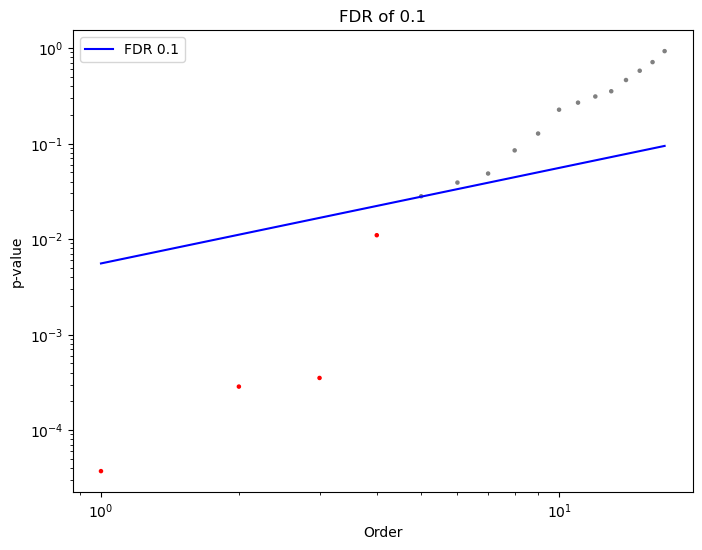

Threshold p-value at 10% FDR: 0.0110


In [37]:
def fdr_cut(pvals, q=0.1):
    """
    Determine the threshold p-value at a given FDR level and plot the p-values.

    Parameters:
        pvals (list or array): A list or array of p-values.
        q (float): The desired FDR level.

    Returns:
        float: The threshold p-value at the given FDR level.
    """
    # Sort p-values and remove NaNs
    pvals = sorted([p for p in pvals if not pd.isna(p)])
    N = len(pvals)
    k = np.arange(1, N + 1)
    alpha = max(p for p, rank in zip(pvals, k) if p <= q * rank / (N + 1))

    # Plot the p-values
    plt.figure(figsize=(8, 6))
    plt.scatter(k, pvals, c=['gray' if p > alpha else 'red' for p in pvals], s=5)
    plt.plot(k, q * k / (N + 1), color='blue', label=f'FDR {q}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Order")
    plt.ylabel("p-value")
    plt.title(f"FDR of {q}")
    plt.legend()
    plt.show()

    return alpha

# Apply the function on the extracted p-values
threshold = fdr_cut(p_values)
print(f"Threshold p-value at 10% FDR: {threshold:.4f}")


In [38]:
# Identify significant predictors based on the threshold p-value
significant_predictors = p_values[p_values <= threshold].index.tolist()

# Include the dependent variable 'FAIL' in the selected columns
selected_columns = ['diagnosis'] + significant_predictors

# Prepare the data for the new model
X_cut = new_df[selected_columns].drop('diagnosis', axis=1)
X_cut = sm.add_constant(X_cut)  # Add a constant (intercept) to the predictors
y_cut = [0 if x == "B" else 1 for x in df['diagnosis']]

# Fit the new GLM model using only the significant predictors
cut_model = sm.GLM(y_cut, X_cut, family=sm.families.Binomial()).fit()

# Calculate the R^2 value for the new model
r_squared_cut = 1 - (cut_model.deviance / cut_model.null_deviance)

print(f"R^2 value for the new model: {r_squared_cut:.4f}")


R^2 value for the new model: 0.7751


- Feature selection using stepwise regression

#### 10 fold Cross validation

In [39]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True, random_state = 0)
#kf.get_n_splits(X)

OOS_full = []
OOS_reduce = []

for (train_id, test_id) in kf.split(new_df):
    
    # Full model
    X_full_train = sm.add_constant(new_df.drop('diagnosis', axis=1).iloc[train_id])
    y_train = pd.Series([0 if x == "B" else 1 for x in df['diagnosis']]).iloc[train_id]
    rfull = sm.GLM(y_train, X_full_train, family=sm.families.Binomial()).fit()
    
    # Reduced model
    X_cut_train = sm.add_constant(new_df[['diagnosis'] + significant_predictors].iloc[train_id].drop('diagnosis', axis=1))
    rcut = sm.GLM(y_train, X_cut_train, family=sm.families.Binomial()).fit()
    
    # Predictions
    X_full_test = sm.add_constant(new_df.drop('diagnosis', axis=1).iloc[test_id])
    pred_full = rfull.predict(X_full_test)
    
    X_cut_test = sm.add_constant(new_df[['diagnosis'] + significant_predictors].iloc[test_id].drop('diagnosis', axis=1))
    pred_cut = rcut.predict(X_cut_test)

    # Calculate R2 and store
    y_test = pd.Series([0 if x == "B" else 1 for x in df['diagnosis']]).iloc[test_id]
    OOS_full.append(R2(y_test, pred_full, family="binomial"))
    OOS_reduce.append(R2(y_test, pred_cut, family="binomial"))

In [40]:
OOS_full

[0.8858599802029677,
 nan,
 nan,
 0.981077407205751,
 0.881710751919001,
 0.4926717942026356,
 nan,
 0.8866862448941093,
 nan,
 0.8792259994261772]

In [41]:
OOS_reduce

[0.7890312849197738,
 0.7678028370520901,
 0.743272971684185,
 0.8388571201105252,
 0.7830143300347758,
 0.47169378090363023,
 0.7259168682583069,
 0.7564981789685493,
 0.9158613748132443,
 0.8031956110673719]

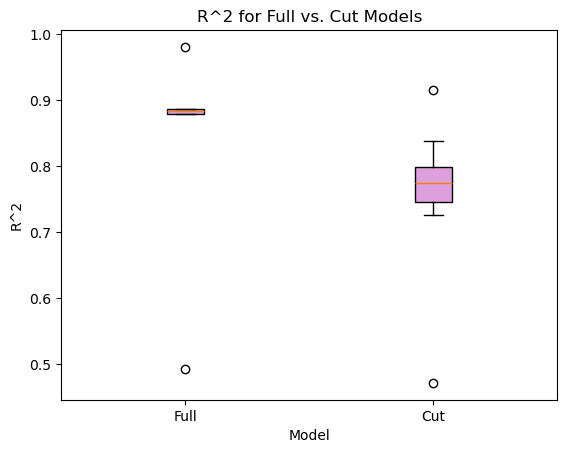

In [42]:
# Cleaning OOS_full
OOS_full_cleaned = [value for value in OOS_full if not np.isinf(value) and not np.isnan(value)]
OOS_reduce_cleaned = [value for value in OOS_reduce if not np.isinf(value) and not np.isnan(value)]

plt.boxplot([OOS_full_cleaned, OOS_reduce_cleaned], labels=['Full', 'Cut'], patch_artist=True, boxprops=dict(facecolor="plum"))
plt.ylabel('R^2')
plt.xlabel('Model')
plt.title('R^2 for Full vs. Cut Models')
plt.show()

In [43]:
# Calculate average OOS R^2 values
avg_OOS_full = np.mean(OOS_full)
avg_OOS_cut = np.mean(OOS_reduce)
print("Average OOS R^2 for Full Model:", avg_OOS_full)
print("Average OOS R^2 for Cut Model:", avg_OOS_cut)

Average OOS R^2 for Full Model: nan
Average OOS R^2 for Cut Model: 0.7595144357812453


#### Notes on full model vs reduced model

- 